# Topic: Custumer Clustering with RFM & Clustering Algorithm
## Project 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime

# Ph·∫ßn 1:
## 1.ƒê·ªçc t·∫≠p tin d·ªØ li·ªáu

In [2]:
data_transactions = pd.read_csv('D:/DL0/project1/GUI_kmeans/Transactions.csv')

In [3]:
data_products = pd.read_csv('D:/DL0/project1/GUI_kmeans/Products_with_Categories.csv')

## 2. Xem th√¥ng tin s∆° b·ªô

In [4]:
# Hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu t·∫≠p tin Transactions.csv
data_transactions.head()


Member_number        Date  productId  items
0           1808  21-07-2015          1      3
1           2552  05-01-2015          2      1
2           2300  19-09-2015          3      3
3           1187  12-12-2015          4      3
4           3037  01-02-2015          2      1

In [5]:
# Hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu t·∫≠p tin Products_with_Categories.csv
data_products.head()

productId       productName  price         Category
0          1    tropical fruit    7.8       Fresh Food
1          2        whole milk    1.8            Dairy
2          3         pip fruit    3.0       Fresh Food
3          4  other vegetables    0.8       Fresh Food
4          5        rolls/buns    1.2  Bakery & Sweets

In [6]:
# Hi·ªÉn th·ªã k√≠ch th∆∞·ªõc c·ªßa dataframe
print(data_products.shape)
print(data_transactions.shape)


(167, 4)
(38765, 4)


In [7]:
# Ki·ªÉm tra gi√° tr·ªã thi·∫øu trong data_products
print("Missing values in data_products:")
print(data_products.isnull().sum())

# Ki·ªÉm tra gi√° tr·ªã thi·∫øu trong data_transactions
print("\nMissing values in data_transactions:")
print(data_transactions.isnull().sum())


Missing values in data_products:
productId      0
productName    0
price          0
Category       0
dtype: int64

Missing values in data_transactions:
Member_number    0
Date             0
productId        0
items            0
dtype: int64


* kh√¥ng c√≥ gi√° tr·ªã n√†o b·ªã thi·∫øu

In [8]:
data_transactions.info(), data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    167 non-null    int64  
 1   productName  167 non-null    object 
 2   price        167 non-null    float64
 3   Category     167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


(None, None)

In [9]:
# Ki·ªÉm tra xem c√≥ d·ªØ li·ªáu tr√πng l·∫∑p hay kh√¥ng trong Products_with_Categories.csv
if data_products.duplicated().any():
    print("C√≥ d·ªØ li·ªáu tr√πng l·∫∑p trong DataFrame.")
else:
    print("Kh√¥ng c√≥ d·ªØ li·ªáu tr√πng l·∫∑p trong DataFrame.")

Kh√¥ng c√≥ d·ªØ li·ªáu tr√πng l·∫∑p trong DataFrame.


In [10]:
# Ki·ªÉm tra xem c√≥ d·ªØ li·ªáu tr√πng l·∫∑p hay kh√¥ng trong Transactions.csv
if data_transactions.duplicated().any():
    print("C√≥ d·ªØ li·ªáu tr√πng l·∫∑p trong DataFrame.")
else:
    print("Kh√¥ng c√≥ d·ªØ li·ªáu tr√πng l·∫∑p trong DataFrame.")

C√≥ d·ªØ li·ªáu tr√πng l·∫∑p trong DataFrame.


In [11]:
# Hi·ªÉn th·ªã c√°c d·ªØ li·ªáu tr√πng l·∫∑p trong data_transactions
duplicate_transactions = data_transactions[data_transactions.duplicated(keep=False)].copy()
duplicate_transactions["index"] = duplicate_transactions.index
duplicate_transactions = duplicate_transactions.sort_values(by=data_transactions.columns[:-1].tolist())

print("C√°c c·∫∑p d√≤ng tr√πng l·∫∑p trong Transactions.csv:")
for _, group in duplicate_transactions.groupby(data_transactions.columns[:-1].tolist()):
    if len(group) > 1:
        print(group[["index"] + data_transactions.columns[:-1].tolist()])
        print("-" * 50)

C√°c c·∫∑p d√≤ng tr√πng l·∫∑p trong Transactions.csv:
       index  Member_number        Date  productId
4769    4769           1026  28-05-2015         22
20918  20918           1026  28-05-2015         22
--------------------------------------------------
       index  Member_number        Date  productId
29972  29972           1045  12-01-2014         18
37270  37270           1045  12-01-2014         18
--------------------------------------------------
       index  Member_number        Date  productId
8090    8090           1052  06-07-2015         18
20687  20687           1052  06-07-2015         18
--------------------------------------------------
       index  Member_number        Date  productId
5475    5475           1132  19-02-2015          4
21624  21624           1132  19-02-2015          4
--------------------------------------------------
       index  Member_number        Date  productId
29826  29826           1133  21-03-2014         71
37124  37124           1133 

In [12]:
# Nh√≥m l·∫°i theo kh√°ch h√†ng, ng√†y v√† s·∫£n ph·∫©m ƒë·ªÉ ƒë·∫øm s·ªë l·∫ßn mua
repeat_purchases = data_transactions.groupby(["Member_number", "Date", "productId"]).size().reset_index(name="purchase_count")

# L·ªçc ra nh·ªØng ai mua nhi·ªÅu h∆°n 1 l·∫ßn
repeat_purchases = repeat_purchases[repeat_purchases["purchase_count"] > 1]

# Hi·ªÉn th·ªã k·∫øt qu·∫£
repeat_purchases

Member_number        Date  productId  purchase_count
39              1003  27-02-2014          5               2
61              1005  09-01-2014          5               2
73              1006  14-06-2015          9               2
83              1008  21-07-2015         18               2
266             1026  28-05-2015         22               2
...              ...         ...        ...             ...
37698           4960  19-08-2015         17               2
37751           4968  04-03-2014          8               2
37847           4981  10-01-2015         70               3
37909           4988  29-10-2015          5               2
37948           4992  24-02-2014         70               2

[732 rows x 4 columns]

### Nh·∫≠n x√©t:
- N·∫øu m·ªôt d√≤ng b·ªã tr√πng l·∫∑p, ƒëi·ªÅu ƒë√≥ c√≥ th·ªÉ do kh√°ch h√†ng ƒë√£ th·ª±c hi·ªán nhi·ªÅu giao d·ªãch gi·ªëng nhau trong c√πng m·ªôt ng√†y.
- C√≥ th·ªÉ c√≥ khuy·∫øn m√£i d·∫´n t·ªõi khi·∫øn h·ªç mu·ªën ƒë·∫∑t ri√™ng ƒë·ªÉ nh·∫≠n ƒë∆∞·ª£c ∆∞u ƒë√£i t·ªët h∆°n
## **Ta s·∫Ω xem s√©t c√≥ n√™n lo·∫°i b·ªè c√°c d√≤ng tr√πng l·∫∑p kh√¥ng**


## 3. K·∫øt h·ª£p hai csv v·ªõi nhau d·ª±a tr√™n productId

In [13]:
# Merge transactions v·ªõi products d·ª±a tr√™n productId
merged_data = pd.merge(data_transactions, data_products, on="productId", how="left")

# Hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu ti√™n ƒë·ªÉ ki·ªÉm tra
merged_data.head()


Member_number        Date  productId  items       productName  price  \
0           1808  21-07-2015          1      3    tropical fruit    7.8   
1           2552  05-01-2015          2      1        whole milk    1.8   
2           2300  19-09-2015          3      3         pip fruit    3.0   
3           1187  12-12-2015          4      3  other vegetables    0.8   
4           3037  01-02-2015          2      1        whole milk    1.8   

     Category  
0  Fresh Food  
1       Dairy  
2  Fresh Food  
3  Fresh Food  
4       Dairy

In [14]:
merged_data.shape

(38765, 7)


# Ph·∫ßn 2: EDA

## X√°c ƒë·ªãnh c√°c bi·∫øn ƒë·ªãnh t√≠nh v√† in th√¥ng tin

In [15]:
merged_data.head(5)

Member_number        Date  productId  items       productName  price  \
0           1808  21-07-2015          1      3    tropical fruit    7.8   
1           2552  05-01-2015          2      1        whole milk    1.8   
2           2300  19-09-2015          3      3         pip fruit    3.0   
3           1187  12-12-2015          4      3  other vegetables    0.8   
4           3037  01-02-2015          2      1        whole milk    1.8   

     Category  
0  Fresh Food  
1       Dairy  
2  Fresh Food  
3  Fresh Food  
4       Dairy

In [16]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Member_number  38765 non-null  int64  
 1   Date           38765 non-null  object 
 2   productId      38765 non-null  int64  
 3   items          38765 non-null  int64  
 4   productName    38765 non-null  object 
 5   price          38765 non-null  float64
 6   Category       38765 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ MB


In [17]:
cat_cols = merged_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Date', 'productName', 'Category'], dtype='object')

In [18]:
for col in cat_cols:
    print(col, merged_data[col].nunique())

Date 728
productName 167
Category 11


### Th√¥ng tin

- **productName**: T√™n c·ªßa s·∫£n ph·∫©m m√† kh√°ch h√†ng ƒë√£ mua.
- **Category**: Nh√≥m danh m·ª•c m√† s·∫£n ph·∫©m thu·ªôc v·ªÅ.
- **Date**: N√™n mang ƒë·ªãnh d·∫°ng th·ªùi gian ch·ª© kh√¥ng ph·∫£i Object. -> chuy·ªÉn v·ªÅ Date


## Chuy·ªÉn ƒë·ªãnh d·∫°ng c·ªôt "Date"

In [19]:
# Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu c·ªßa c·ªôt 'day'
merged_data['Date'].head(10)


0    21-07-2015
1    05-01-2015
2    19-09-2015
3    12-12-2015
4    01-02-2015
5    14-02-2015
6    08-05-2015
7    23-12-2015
8    20-03-2015
9    12-02-2015
Name: Date, dtype: object

* ƒë·ªãnh d·∫°ng theo ng√†y/th√°ng/nƒÉm

In [20]:
string_to_date = lambda x : datetime.strptime(x, "%d-%m-%Y").date()

# Convert InvoiceDate from object to datetime format
merged_data['Date'] = merged_data['Date'].apply(string_to_date)
merged_data['Date'] = merged_data['Date'].astype('datetime64[ns]')

# Drop NA values
merged_data = merged_data.dropna()

In [21]:
# Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu c·ªßa c·ªôt 'day'
merged_data['Date'].head(10)


0   2015-07-21
1   2015-01-05
2   2015-09-19
3   2015-12-12
4   2015-02-01
5   2015-02-14
6   2015-05-08
7   2015-12-23
8   2015-03-20
9   2015-02-12
Name: Date, dtype: datetime64[ns]

* ƒê√£ chuy·ªÉn v·ªÅ d·∫°ng datetime64

In [22]:
# Ki·ªÉm tra c√≤n day trong bi·∫øn ƒë·ªãnh t√≠nh kh√¥ng
cat_cols = merged_data.select_dtypes(include=['object']).columns
cat_cols

Index(['productName', 'Category'], dtype='object')

## X√°c ƒë·ªãnh c√°c bi·∫øn ƒë·ªãnh l∆∞·ª£ng v√† in th√¥ng tin

In [23]:
num_cols = merged_data.select_dtypes(include=['number']).columns
num_cols

Index(['Member_number', 'productId', 'items', 'price'], dtype='object')

In [24]:
for col in num_cols:
    print(col, merged_data[col].nunique())

Member_number 3898
productId 167
items 3
price 90


#### Th√¥ng tin kh√°ch h√†ng

- **Member_number**: ID duy nh·∫•t c·ªßa kh√°ch h√†ng.

#### Th√¥ng tin s·∫£n ph·∫©m
- **productId**: ID c·ªßa s·∫£n ph·∫©m.
- **items**:  S·ªë l∆∞·ª£ng s·∫£n ph·∫©m mua trong m·ªôt giao d·ªãch.
- **price**: Gi√° c·ªßa s·∫£n ph·∫©m.

In [25]:
merged_data.head()

Member_number       Date  productId  items       productName  price  \
0           1808 2015-07-21          1      3    tropical fruit    7.8   
1           2552 2015-01-05          2      1        whole milk    1.8   
2           2300 2015-09-19          3      3         pip fruit    3.0   
3           1187 2015-12-12          4      3  other vegetables    0.8   
4           3037 2015-02-01          2      1        whole milk    1.8   

     Category  
0  Fresh Food  
1       Dairy  
2  Fresh Food  
3  Fresh Food  
4       Dairy

In [26]:
# Ki·ªÉm tra kho·∫£ng th·ªùi gian c·ªßa d·ªØ li·ªáu
min_date = merged_data['Date'].min().date()
max_date = merged_data['Date'].max().date()
print(f'Transactions timeframe from {min_date} to {max_date}')

Transactions timeframe from 2014-01-01 to 2015-12-30


* D·ªØ li·ªáu trong kho·∫£ng 24 th√°ng t·ª´ nƒÉm 2014-2015

In [27]:
# Ki·ªÉm tra giao d·ªãch kh√¥ng c√≥ Member_number
missing_customer_ids = merged_data['Member_number'].isnull().sum()
print(f'{missing_customer_ids:,} transactions don\'t have a Member_number')

0 transactions don't have a Member_number


In [28]:
# ƒê·∫øm s·ªë l∆∞·ª£ng kh√°ch h√†ng duy nh·∫•t
unique_customers = merged_data['Member_number'].nunique()
print(f'{unique_customers:,} unique Member_number')

3,898 unique Member_number


1. D·ªØ li·ªáu giao d·ªãch c√≥ trong kho·∫£ng t·ª´ 01/11/2014 ƒë·∫øn 30/12/2015. Kho·∫£ng th·ªùi gian n√†y k√©o d√†i 24 th√°ng, ƒë·ªß d√†i ƒë·ªÉ ph√¢n t√≠ch xu h∆∞·ªõng mua h√†ng.
* c·∫ßn ch√∫ √Ω ƒë·∫øn ng√†y cu·ªëi c√πng (30/12/2015) v√¨ ƒë√≥ s·∫Ω l√† m·ªëc tham chi·∫øu ƒë·ªÉ t√≠nh Recency.
2. Kh√¥ng c√≥ giao d·ªãch ·∫©n danh
* ƒêi·ªÅu n√†y gi√∫p √≠ch r·∫•t nhi·ªÅu cho ph√¢n t√≠ch RFM, v√¨ m·ªói giao d·ªãch ƒë·ªÅu c√≥ th·ªÉ ƒë∆∞·ª£c li√™n k·∫øt v·ªõi m·ªôt kh√°ch h√†ng c·ª• th·ªÉ.
3. S·ªë l∆∞·ª£ng kh√°ch h√†ng duy nh·∫•t: 3,898
* C√≥ 3,898 kh√°ch h√†ng duy nh·∫•t ƒë√£ mua h√†ng trong kho·∫£ng th·ªùi gian 24 th√°ng.


# RFM (Recency - Frequency - Monetary)

# Ch·ªçn c·ªôt cho RFM Analysis

## 1. Recency (R) ‚Äì ƒê√°nh gi√° th·ªùi gian t·ª´ l·∫ßn mua g·∫ßn nh·∫•t
- **C·ªôt c·∫ßn d√πng:**
  - **Member_number**: X√°c ƒë·ªãnh t·ª´ng kh√°ch h√†ng duy nh·∫•t.
  - **Date**: Ng√†y di·ªÖn ra giao d·ªãch.

- **L√Ω do ch·ªçn:**
  - `Date` gi√∫p x√°c ƒë·ªãnh ng√†y mua g·∫ßn nh·∫•t c·ªßa m·ªói kh√°ch h√†ng.
  - Kho·∫£ng c√°ch gi·ªØa ng√†y g·∫ßn nh·∫•t n√†y v√† ng√†y ph√¢n t√≠ch cho ta gi√° tr·ªã Recency.

- **üîπ C√°ch t√≠nh Recency:**
  - X√°c ƒë·ªãnh ng√†y mua h√†ng cu·ªëi c√πng c·ªßa m·ªói kh√°ch h√†ng.
  - T√≠nh s·ªë ng√†y t·ª´ l·∫ßn mua g·∫ßn nh·∫•t ƒë·∫øn ng√†y ph√¢n t√≠ch.

---

## 2. Frequency (F) ‚Äì ƒê√°nh gi√° s·ªë l·∫ßn mua h√†ng
- **C·ªôt c·∫ßn d√πng:**
  - **Member_number**: X√°c ƒë·ªãnh t·ª´ng kh√°ch h√†ng.
  - **Date**: D√πng ƒë·ªÉ ƒë·∫øm s·ªë l·∫ßn kh√°ch h√†ng ƒë√£ mua h√†ng.

- **L√Ω do ch·ªçn:**
  - Frequency ƒë∆∞·ª£c t√≠nh b·∫±ng s·ªë l·∫ßn kh√°ch h√†ng c√≥ giao d·ªãch trong t·∫≠p d·ªØ li·ªáu.
  - Ta ƒë·∫øm s·ªë l·∫ßn `Date` xu·∫•t hi·ªán cho t·ª´ng `Member_number`.

---

## 3. Monetary (M) ‚Äì ƒê√°nh gi√° t·ªïng s·ªë ti·ªÅn ƒë√£ chi ti√™u
- **C·ªôt c·∫ßn d√πng:**
  - **Member_number**: X√°c ƒë·ªãnh t·ª´ng kh√°ch h√†ng.
  - **price**: Gi√° c·ªßa t·ª´ng s·∫£n ph·∫©m.
  - **items**: S·ªë l∆∞·ª£ng s·∫£n ph·∫©m mua.

- **L√Ω do ch·ªçn:**
  - Monetary = T·ªïng s·ªë ti·ªÅn m√† kh√°ch h√†ng ƒë√£ chi ti√™u.
  - ta t√≠nh:
    - **T·ªïng ti·ªÅn = price √ó items**


In [29]:
merged_data["total_price"] = merged_data["price"] * merged_data["items"]


In [30]:
merged_data.head()


Member_number       Date  productId  items       productName  price  \
0           1808 2015-07-21          1      3    tropical fruit    7.8   
1           2552 2015-01-05          2      1        whole milk    1.8   
2           2300 2015-09-19          3      3         pip fruit    3.0   
3           1187 2015-12-12          4      3  other vegetables    0.8   
4           3037 2015-02-01          2      1        whole milk    1.8   

     Category  total_price  
0  Fresh Food         23.4  
1       Dairy          1.8  
2  Fresh Food          9.0  
3  Fresh Food          2.4  
4       Dairy          1.8

### T·ªïng doanh thu theo nƒÉm

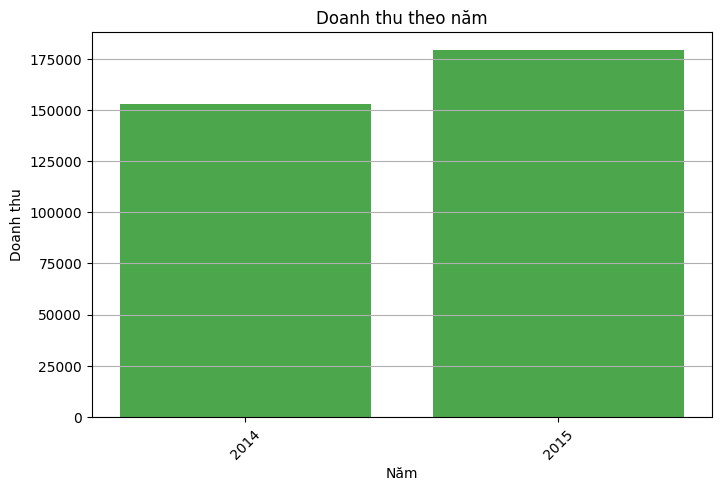

In [31]:

merged_data['Year'] = merged_data['Date'].dt.year

# T·ªïng doanh thu theo nƒÉm
revenue_by_year = merged_data.groupby('Year')['total_price'].sum()

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
plt.figure(figsize=(8, 5))
plt.bar(revenue_by_year.index.astype(str), revenue_by_year.values, color='g', alpha=0.7)

plt.xlabel('NƒÉm')
plt.ylabel('Doanh thu')
plt.title('Doanh thu theo nƒÉm')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Doanh thu theo th·ªùi gian

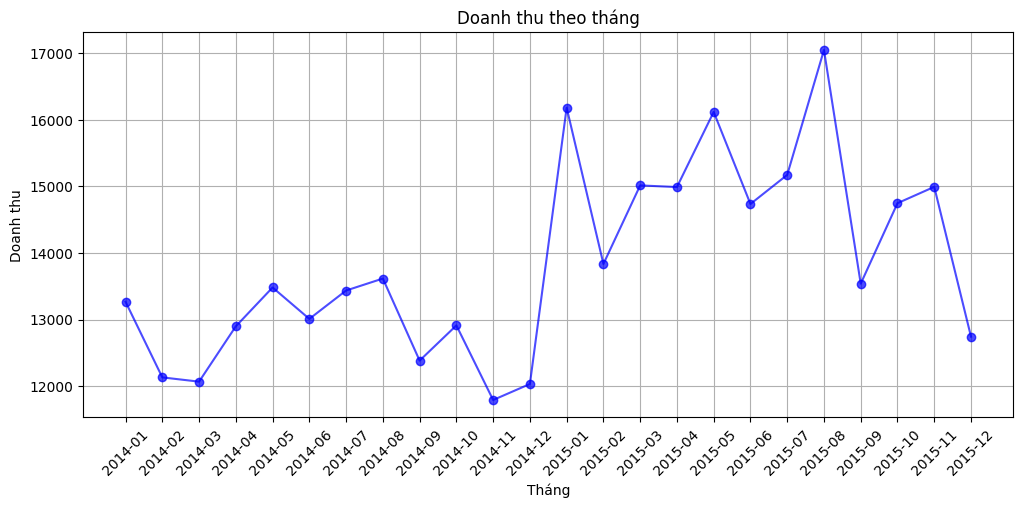

In [32]:
# Nh√≥m theo th√°ng
merged_data['YearMonth'] = merged_data['Date'].dt.to_period('M')
revenue_by_month = merged_data.groupby('YearMonth')['total_price'].sum()

# V·∫Ω bi·ªÉu ƒë·ªì ƒë∆∞·ªùng
plt.figure(figsize=(12, 5))
plt.plot(revenue_by_month.index.astype(str), revenue_by_month.values, marker='o', linestyle='-', color='b', alpha=0.7)

plt.xlabel('Th√°ng')
plt.ylabel('Doanh thu')
plt.title('Doanh thu theo th√°ng')
plt.xticks(rotation=45)
plt.grid()
plt.show()


# Ph√¢n t√≠ch hai bi·ªÉu ƒë·ªì doanh thu theo th·ªùi gian

## 1. Bi·ªÉu ƒë·ªì doanh thu theo nƒÉm (H√¨nh 1 - Bi·ªÉu ƒë·ªì c·ªôt)
- **T·ªïng quan:**  
  Bi·ªÉu ƒë·ªì n√†y hi·ªÉn th·ªã t·ªïng doanh thu theo nƒÉm (2014 v√† 2015).

- **Nh·∫≠n x√©t:**  
  - NƒÉm 2015 c√≥ doanh thu cao h∆°n nƒÉm 2014, ch·ª©ng t·ªè ho·∫°t ƒë·ªông kinh doanh tƒÉng tr∆∞·ªüng.  
  - M·ª©c tƒÉng tr∆∞·ªüng kh√¥ng qu√° m·∫°nh, ch·ªâ tƒÉng t·ª´ kho·∫£ng 150,000 l√™n 180,000 (tƒÉng kho·∫£ng 20%).  

- **Nguy√™n nh√¢n:**  
  ƒêi·ªÅu n√†y c√≥ th·ªÉ do s·ªë l∆∞·ª£ng giao d·ªãch ho·∫∑c gi√° tr·ªã ƒë∆°n h√†ng trung b√¨nh trong nƒÉm 2015 tƒÉng so v·ªõi nƒÉm 2014.

---

## 2. Bi·ªÉu ƒë·ªì doanh thu theo th√°ng (H√¨nh 2 - Bi·ªÉu ƒë·ªì ƒë∆∞·ªùng)
- **T·ªïng quan:**  
  Bi·ªÉu ƒë·ªì n√†y cho th·∫•y s·ª± bi·∫øn ƒë·ªông c·ªßa doanh thu t·ª´ng th√°ng trong giai ƒëo·∫°n 2014 - 2015.

- **Nh·∫≠n x√©t:**  
  - Doanh thu c√≥ nhi·ªÅu bi·∫øn ƒë·ªông, kh√¥ng ·ªïn ƒë·ªãnh.  
  - M·ªôt s·ªë th√°ng ƒë·∫°t ƒë·ªânh cao nh∆∞ng sau ƒë√≥ gi·∫£m m·∫°nh.  

- **Giai ƒëo·∫°n n·ªïi b·∫≠t:**  
  - M·ªôt s·ªë th√°ng c√≥ doanh thu r·∫•t cao, ƒë·∫∑c bi·ªát l√† th√°ng 8/2015, ƒë√¢y c√≥ th·ªÉ l√† m√πa cao ƒëi·ªÉm (sale, l·ªÖ h·ªôi, khuy·∫øn m√£i).  
  - Xu h∆∞·ªõng chung cho th·∫•y nƒÉm 2015 c√≥ doanh thu cao h∆°n 2014, nh∆∞ng v·∫´n c√≥ s·ª± dao ƒë·ªông m·∫°nh.

---

## K·∫øt lu·∫≠n
1. **Xu h∆∞·ªõng chung:**  
   - Doanh thu c√≥ xu h∆∞·ªõng tƒÉng tr∆∞·ªüng qua c√°c nƒÉm, nh∆∞ng v·∫´n c√≥ s·ª± dao ƒë·ªông theo th√°ng.

2. **Giai ƒëo·∫°n cao ƒëi·ªÉm:**  
   - M·ªôt s·ªë th√°ng nh∆∞ 8/2015 c√≥ doanh thu r·∫•t cao, c√≥ th·ªÉ do chi·∫øn d·ªãch khuy·∫øn m√£i ho·∫∑c m√πa cao ƒëi·ªÉm mua s·∫Øm.

3. **Khuy·∫øn ngh·ªã:**  
   - N√™n ph√¢n t√≠ch k·ªπ h∆°n t·∫°i sao m·ªôt s·ªë th√°ng c√≥ doanh thu cao ƒë·ªôt bi·∫øn ƒë·ªÉ c√≥ th·ªÉ t·ªëi ∆∞u chi·∫øn l∆∞·ª£c kinh doanh, duy tr√¨ doanh thu ·ªïn ƒë·ªãnh h∆°n.


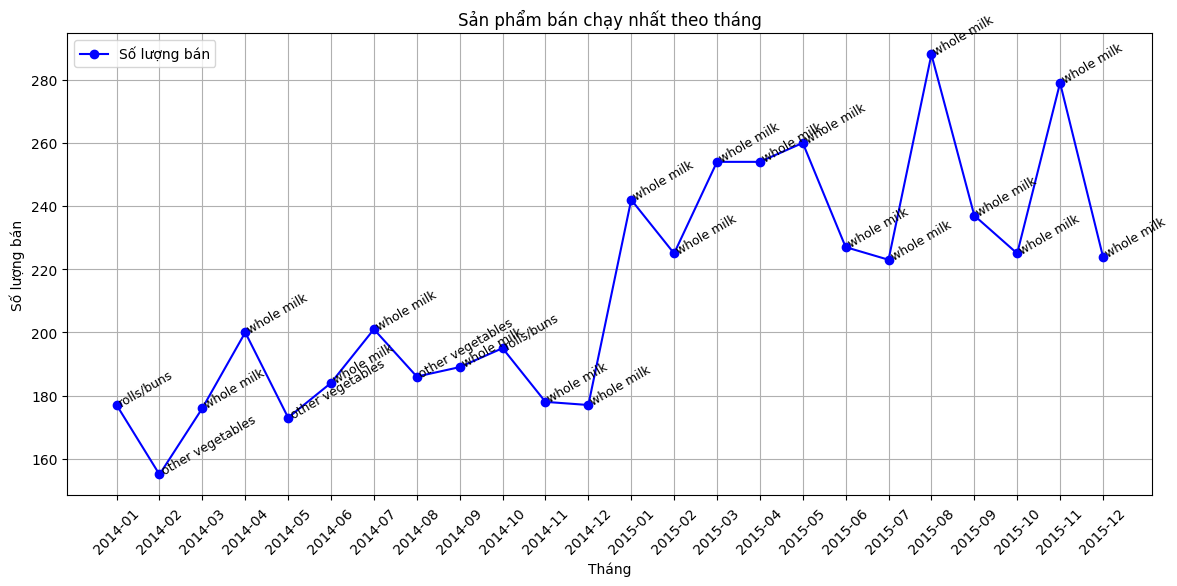

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuy·ªÉn ƒë·ªïi c·ªôt 'Date' th√†nh ƒë·ªãnh d·∫°ng datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data['YearMonth'] = merged_data['Date'].dt.to_period('M')

# Nh√≥m theo th√°ng v√† s·∫£n ph·∫©m, t√≠nh t·ªïng s·ªë l∆∞·ª£ng b√°n
monthly_sales = merged_data.groupby(['YearMonth', 'productName'])['items'].sum().reset_index()

# L·ªçc ra s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t m·ªói th√°ng
top_products = monthly_sales.loc[monthly_sales.groupby('YearMonth')['items'].idxmax()]

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(14, 6))
plt.plot(top_products['YearMonth'].astype(str), top_products['items'], marker='o', linestyle='-', color='b', label='S·ªë l∆∞·ª£ng b√°n')
plt.xlabel('Th√°ng')
plt.ylabel('S·ªë l∆∞·ª£ng b√°n')
plt.title('S·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t theo th√°ng')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# G·∫Øn nh√£n t√™n s·∫£n ph·∫©m l√™n ƒëi·ªÉm d·ªØ li·ªáu
for i, txt in enumerate(top_products['productName']):
    plt.annotate(txt, (top_products['YearMonth'].astype(str).iloc[i], top_products['items'].iloc[i]), fontsize=9, rotation=30)

plt.show()


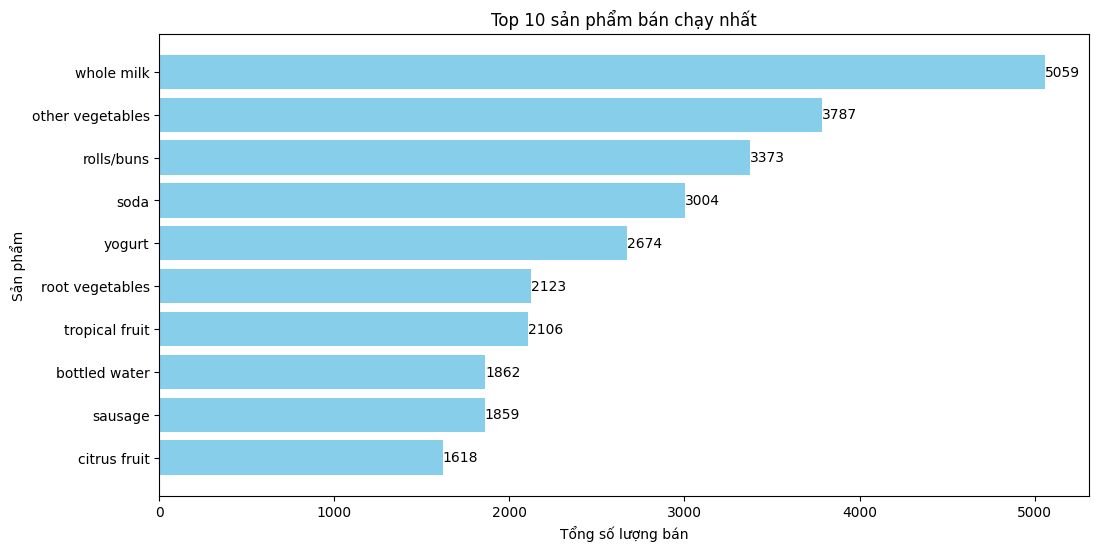

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Nh√≥m theo s·∫£n ph·∫©m v√† t√≠nh t·ªïng s·ªë l∆∞·ª£ng b√°n
product_sales = merged_data.groupby('productName')['items'].sum().reset_index()

# S·∫Øp x·∫øp gi·∫£m d·∫ßn theo s·ªë l∆∞·ª£ng b√°n
top_products = product_sales.sort_values(by='items', ascending=False).head(10)

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(12, 6))
plt.barh(top_products['productName'], top_products['items'], color='skyblue')
plt.xlabel('T·ªïng s·ªë l∆∞·ª£ng b√°n')
plt.ylabel('S·∫£n ph·∫©m')
plt.title('Top 10 s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t')
plt.gca().invert_yaxis()  # ƒê·∫£o ng∆∞·ª£c tr·ª•c Y ƒë·ªÉ s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t ·ªü tr√™n c√πng

# Hi·ªÉn th·ªã s·ªë l∆∞·ª£ng b√°n tr√™n t·ª´ng c·ªôt
for index, value in enumerate(top_products['items']):
    plt.text(value, index, str(value), va='center')

plt.show()


# Ph√¢n t√≠ch bi·ªÉu ƒë·ªì

## Bi·ªÉu ƒë·ªì ƒë∆∞·ªùng (h√¨nh ƒë·∫ßu ti√™n)
- **Tr·ª•c ho√†nh (X):** Hi·ªÉn th·ªã c√°c th√°ng t·ª´ th√°ng 1/2014 ƒë·∫øn th√°ng 12/2015.
- **Tr·ª•c tung (Y):** Hi·ªÉn th·ªã s·ªë l∆∞·ª£ng b√°n ra c·ªßa s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t trong t·ª´ng th√°ng.
- **C√°c ƒëi·ªÉm:**
  - Th·ªÉ hi·ªán s·∫£n ph·∫©m c√≥ s·ªë l∆∞·ª£ng b√°n cao nh·∫•t trong th√°ng ƒë√≥.
  - Nh√£n ghi tr√™n t·ª´ng ƒëi·ªÉm th·ªÉ hi·ªán t√™n s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t.

### Nh·∫≠n x√©t:
- S·∫£n ph·∫©m **"whole milk"** (s·ªØa nguy√™n kem) l√† s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t trong nhi·ªÅu th√°ng.
- Ph√¢n t√≠ch n√†y gi√∫p x√°c ƒë·ªãnh s·∫£n ph·∫©m ch·ªß l·ª±c v√† xu h∆∞·ªõng mua h√†ng.

---

## Bi·ªÉu ƒë·ªì c·ªôt ngang (h√¨nh th·ª© hai)
- **Tr·ª•c ho√†nh (X):** Hi·ªÉn th·ªã t·ªïng s·ªë l∆∞·ª£ng s·∫£n ph·∫©m ƒë√£ b√°n.
- **Tr·ª•c tung (Y):** Hi·ªÉn th·ªã t√™n c√°c s·∫£n ph·∫©m.
- **Thanh ngang:** Bi·ªÉu di·ªÖn t·ªïng s·ªë l∆∞·ª£ng b√°n c·ªßa t·ª´ng s·∫£n ph·∫©m, gi√∫p d·ªÖ d√†ng so s√°nh m·ª©c ƒë·ªô ph·ªï bi·∫øn.

### Nh·∫≠n x√©t:
- **"whole milk"** l√† s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t v·ªõi h∆°n 5000 ƒë∆°n v·ªã b√°n ra.
- Ti·∫øp theo l√† **"other vegetables"** (rau c·ªß kh√°c) v√† **"rolls/buns"** (b√°nh m√¨, b√°nh cu·ªôn).
- Bi·ªÉu ƒë·ªì n√†y cung c·∫•p c√°i nh√¨n t·ªïng quan v·ªÅ s·ª± ph·ªï bi·∫øn c·ªßa t·ª´ng s·∫£n ph·∫©m.


In [35]:
# ---- T√≠nh to√°n RFM ----
Recency = lambda x: (max_date - x.max().date()).days  # S·ªë ng√†y t·ª´ l·∫ßn mua g·∫ßn nh·∫•t
Frequency = lambda x: x.count()  # S·ªë l·∫ßn kh√°ch h√†ng c√≥ giao d·ªãch
Monetary = lambda x: round(x.sum(), 2)  # T·ªïng ti·ªÅn kh√°ch h√†ng chi ti√™u


# T·∫°o b·∫£ng RFM
df_RFM = merged_data.groupby('Member_number').agg(
    Recency=('Date', Recency),  # T√≠nh Recency d·ª±a tr√™n c·ªôt Date
    Frequency=('Date', Frequency),  # T√≠nh Frequency d·ª±a tr√™n s·ªë l∆∞·ª£ng Date duy nh·∫•t
    Monetary=('total_price', Monetary)  # T√≠nh Monetary d·ª±a tr√™n t·ªïng ti·ªÅn (total_price)
)

In [36]:
df_RFM.head()

Recency  Frequency  Monetary
Member_number                              
1000                35         13     53.80
1001               242         12    100.00
1002               122          8     70.30
1003               323          8     60.65
1004                28         21    204.96

In [37]:
# Descending Sorting
df_RFM = df_RFM.sort_values('Monetary', ascending=False)
df_RFM.head()

Recency  Frequency  Monetary
Member_number                              
2433                 3         31    375.31
2193                91         27    361.45
1793                26         25    345.10
3289                 4         29    334.15
2743               142         17    312.46

# Nh·∫≠n x√©t v·ªÅ output 5 d√≤ng ƒë·∫ßu c·ªßa RFM Analysis

## Ph√¢n t√≠ch d·ªØ li·ªáu

### Kh√°ch h√†ng c√≥ `Member_number = 2433`:
- **Monetary:** 375.31 (chi ti√™u nhi·ªÅu nh·∫•t trong nh√≥m).
- **Recency:** 3 (mua h√†ng r·∫•t g·∫ßn ƒë√¢y, l√† kh√°ch h√†ng t√≠ch c·ª±c).
- **Frequency:** 31 (s·ªë l·∫ßn mua h√†ng nhi·ªÅu nh·∫•t, kh√°ch h√†ng trung th√†nh).

### Kh√°ch h√†ng c√≥ `Member_number = 2193`:
- **Monetary:** 361.45 (chi ti√™u cao, nh∆∞ng th·∫•p h∆°n kh√°ch h√†ng top 1).
- **Recency:** 91 (ƒë√£ kh√¥ng mua h√†ng trong 91 ng√†y, c√≥ th·ªÉ l√† kh√°ch h√†ng l√¢u nƒÉm nh∆∞ng g·∫ßn ƒë√¢y √≠t quay l·∫°i).
- **Frequency:** 27 (s·ªë l·∫ßn mua h√†ng kh√° nhi·ªÅu, nh∆∞ng √≠t h∆°n kh√°ch h√†ng top 1).

### Kh√°ch h√†ng c√≥ `Member_number = 1793`:
- **Monetary:** 345.10.
- **Recency:** 26 (g·∫ßn ƒë√¢y c√≥ mua h√†ng, nh∆∞ng kh√¥ng qu√° th∆∞·ªùng xuy√™n).
- **Frequency:** 25 (s·ªë l·∫ßn mua h√†ng ·ªü m·ª©c trung b√¨nh).

### Kh√°ch h√†ng c√≥ `Member_number = 3289`:
- **Monetary:** 334.15.
- **Recency:** 4 (m·ªõi mua h√†ng g·∫ßn ƒë√¢y).
- **Frequency:** 29 (mua h√†ng kh√° th∆∞·ªùng xuy√™n, ch·ªâ ƒë·ª©ng sau kh√°ch h√†ng top 1).

### Kh√°ch h√†ng c√≥ `Member_number = 2743`:
- **Monetary:** 312.46 (chi ti√™u th·∫•p nh·∫•t trong nh√≥m).
- **Recency:** 142 (ƒë√£ l√¢u kh√¥ng mua h√†ng, c√≥ th·ªÉ l√† kh√°ch h√†ng ƒëang r·ªùi ƒëi).
- **Frequency:** 17 (s·ªë l·∫ßn mua h√†ng th·∫•p nh·∫•t trong nh√≥m).

---

## K·∫øt lu·∫≠n & G·ª£i √Ω

### Kh√°ch h√†ng `Member_number = 2433`:
- L√† kh√°ch h√†ng trung th√†nh nh·∫•t v·ªõi s·ªë l·∫ßn mua h√†ng nhi·ªÅu nh·∫•t v√† chi ti√™u cao nh·∫•t.
- N√™n ƒë∆∞·ª£c ∆∞u ti√™n trong ch∆∞∆°ng tr√¨nh kh√°ch h√†ng th√¢n thi·∫øt ho·∫∑c VIP.

### Kh√°ch h√†ng `Member_number = 2193`:
- ƒê√£ l√¢u kh√¥ng quay l·∫°i mua h√†ng (**Recency = 91**).
- C·∫ßn chi·∫øn d·ªãch ti·∫øp th·ªã nh·∫Øc nh·ªü ho·∫∑c ∆∞u ƒë√£i ƒë·ªÉ k√©o h·ªç quay l·∫°i.

### Kh√°ch h√†ng `Member_number = 3289`:
- T√≠ch c·ª±c mua h√†ng g·∫ßn ƒë√¢y nh∆∞ng chi ti√™u kh√¥ng qu√° cao.
- C√≥ th·ªÉ nh·∫Øm ƒë·∫øn v·ªõi ch∆∞∆°ng tr√¨nh tƒÉng gi√° tr·ªã ƒë∆°n h√†ng, nh∆∞ gi·∫£m gi√° khi mua nhi·ªÅu h∆°n.

### Kh√°ch h√†ng `Member_number = 2743`:
- ƒê√£ kh√¥ng mua h√†ng trong **142 ng√†y**, c√≥ nguy c∆° r·ªùi b·ªè th∆∞∆°ng hi·ªáu.
- C·∫ßn chi·∫øn d·ªãch ti·∫øp c·∫≠n l·∫°i, c√≥ th·ªÉ l√† phi·∫øu gi·∫£m gi√° ho·∫∑c l·ªùi m·ªùi ƒë·∫∑c bi·ªát ƒë·ªÉ k√≠ch th√≠ch quay l·∫°i.


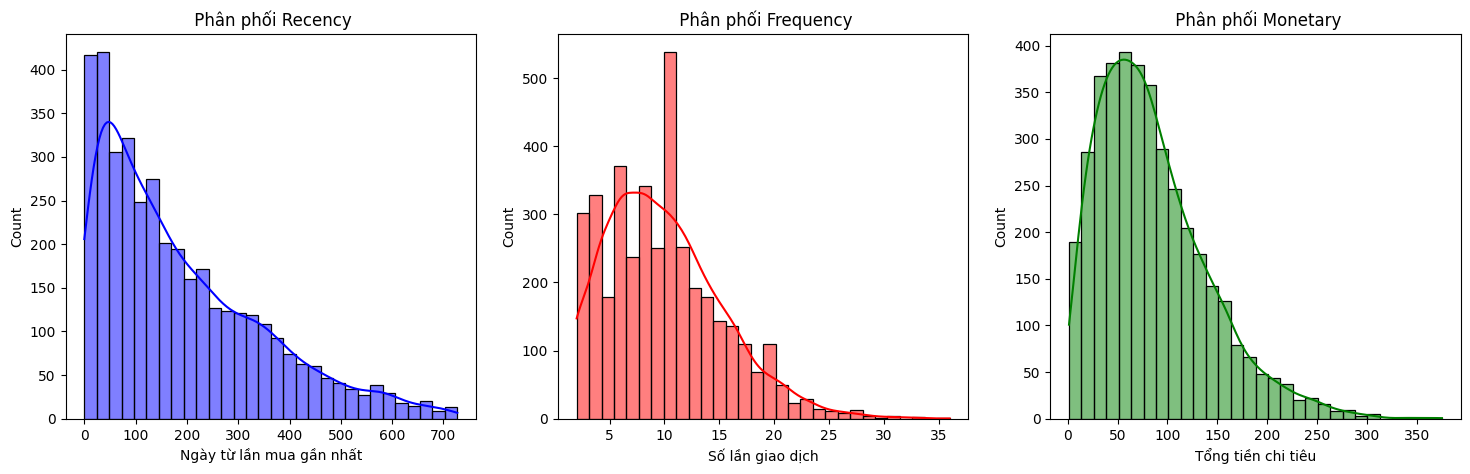

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency
sns.histplot(df_RFM["Recency"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title(" Ph√¢n ph·ªëi Recency")
axes[0].set_xlabel("Ng√†y t·ª´ l·∫ßn mua g·∫ßn nh·∫•t")

# Frequency
sns.histplot(df_RFM["Frequency"], bins=30, kde=True, ax=axes[1], color="red")
axes[1].set_title(" Ph√¢n ph·ªëi Frequency")
axes[1].set_xlabel("S·ªë l·∫ßn giao d·ªãch")

# Monetary
sns.histplot(df_RFM["Monetary"], bins=30, kde=True, ax=axes[2], color="green")
axes[2].set_title(" Ph√¢n ph·ªëi Monetary")
axes[2].set_xlabel("T·ªïng ti·ªÅn chi ti√™u")

plt.show()


# Nh·∫≠n x√©t v·ªÅ bi·ªÉu ƒë·ªì ph√¢n ph·ªëi c·ªßa RFM Analysis

## Bi·ªÉu ƒë·ªì Recency (S·ªë ng√†y t·ª´ l·∫ßn mua g·∫ßn nh·∫•t)
- **Ph√¢n ph·ªëi:** L·ªách ph·∫£i, v·ªõi ph·∫ßn l·ªõn kh√°ch h√†ng c√≥ gi√° tr·ªã Recency nh·ªè (d∆∞·ªõi 100 ng√†y).
- **√ù nghƒ©a:** Nhi·ªÅu kh√°ch h√†ng ƒë√£ mua h√†ng g·∫ßn ƒë√¢y, nh∆∞ng v·∫´n c√≥ m·ªôt s·ªë l∆∞·ª£ng nh·ªè kh√°ch h√†ng kh√¥ng mua h√†ng trong th·ªùi gian d√†i (> 300 ng√†y).
- **G·ª£i √Ω:**
  - Th·ª±c hi·ªán c√°c chi·∫øn d·ªãch ti·∫øp th·ªã ƒë·ªÉ thu h√∫t l·∫°i nh√≥m kh√°ch h√†ng ƒë√£ l√¢u kh√¥ng quay l·∫°i.

---

## Bi·ªÉu ƒë·ªì Frequency (S·ªë l·∫ßn mua h√†ng)
- **Ph√¢n ph·ªëi:** L·ªách ph·∫£i, ph·∫ßn l·ªõn kh√°ch h√†ng c√≥ s·ªë l·∫ßn mua t·ª´ 5 ƒë·∫øn 15 l·∫ßn.
- **√ù nghƒ©a:**
  - C√≥ r·∫•t √≠t kh√°ch h√†ng mua h√†ng nhi·ªÅu h∆°n 20 l·∫ßn, ƒëi·ªÅu n√†y c√≥ th·ªÉ do s·∫£n ph·∫©m kh√¥ng c√≥ t√≠nh ch·∫•t mua l·∫∑p l·∫°i th∆∞·ªùng xuy√™n.
- **G·ª£i √Ω:**
  - Khuy·∫øn kh√≠ch kh√°ch h√†ng tƒÉng t·∫ßn su·∫•t mua qua ch∆∞∆°ng tr√¨nh kh√°ch h√†ng th√¢n thi·∫øt ho·∫∑c ∆∞u ƒë√£i cho l·∫ßn mua ti·∫øp theo.

---

## Bi·ªÉu ƒë·ªì Monetary (T·ªïng ti·ªÅn chi ti√™u)
- **Ph√¢n ph·ªëi:** L·ªách ph·∫£i, v·ªõi ph·∫ßn l·ªõn kh√°ch h√†ng chi ti√™u trong kho·∫£ng 20 - 150 ƒë∆°n v·ªã ti·ªÅn t·ªá.
- **√ù nghƒ©a:**
  - M·ªôt s·ªë √≠t kh√°ch h√†ng c√≥ chi ti√™u r·∫•t cao (> 200), cho th·∫•y c√≥ nh√≥m kh√°ch h√†ng VIP ho·∫∑c mua s·∫Øm nhi·ªÅu.
- **G·ª£i √Ω:**
  - Khai th√°c nh√≥m kh√°ch h√†ng n√†y b·∫±ng ch∆∞∆°ng tr√¨nh ∆∞u ƒë√£i ƒë·∫∑c bi·ªát ƒë·ªÉ gi·ªØ ch√¢n h·ªç.


## V·∫Ω Boxplot ƒë·ªÉ ph√°t hi·ªán Outliers

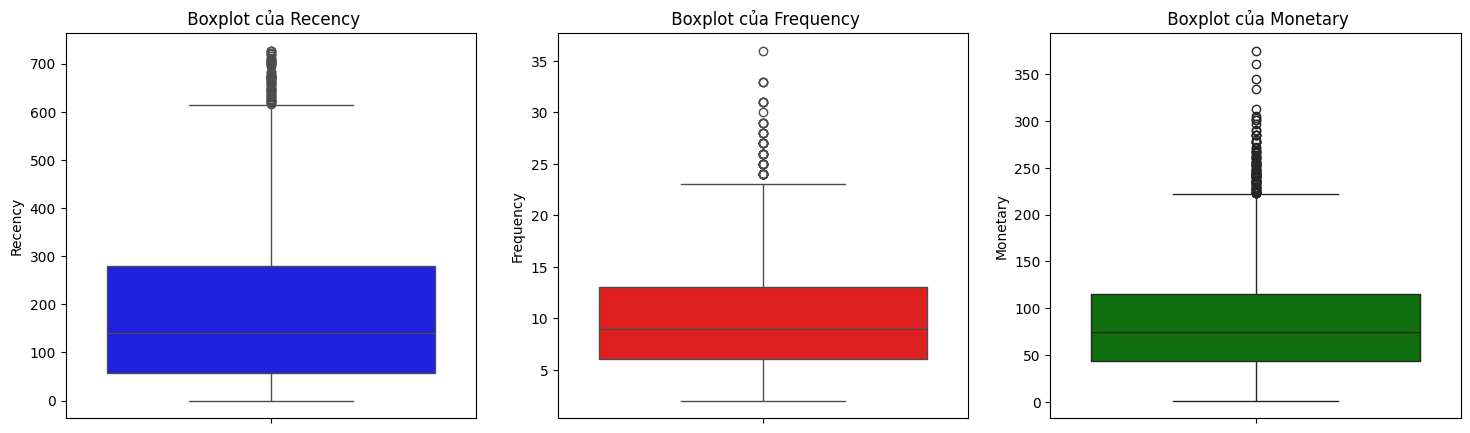

In [39]:
# V·∫Ω Boxplot cho t·ª´ng ch·ªâ s·ªë RFM
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency
sns.boxplot(y=df_RFM["Recency"], ax=axes[0], color="blue")
axes[0].set_title(" Boxplot c·ªßa Recency")

# Frequency
sns.boxplot(y=df_RFM["Frequency"], ax=axes[1], color="red")
axes[1].set_title(" Boxplot c·ªßa Frequency")

# Monetary
sns.boxplot(y=df_RFM["Monetary"], ax=axes[2], color="green")
axes[2].set_title(" Boxplot c·ªßa Monetary")

plt.show()


1. Bi·∫øn Recency:
- C√≥ nhi·ªÅu gi√° tr·ªã ngo·∫°i lai (outliers) ph√≠a tr√™n, ƒë·∫∑c bi·ªát l√† c√°c ƒëi·ªÉm tr√™n 600, th·∫≠m ch√≠ c√≥ m·ªôt s·ªë tr√™n 700. M·ªôt s·ªë kh√°ch h√†ng c√≥ gi√° tr·ªã Recency r·∫•t cao (>600 ng√†y), t·ª©c l√† h·ªç kh√¥ng mua h√†ng trong m·ªôt th·ªùi gian d√†i.
2. Bi·∫øn Frequency
- C√≥ nhi·ªÅu gi√° tr·ªã ngo·∫°i lai ·ªü ph·∫ßn tr√™n, c√≥ kh√°ch h√†ng c√≥ s·ªë l·∫ßn mua h√†ng l√™n t·ªõi 35+ l·∫ßn. M·ªôt nh√≥m nh·ªè kh√°ch h√†ng mua h√†ng v·ªõi t·∫ßn su·∫•t r·∫•t cao (>25 l·∫ßn), c√≥ th·ªÉ l√† kh√°ch h√†ng trung th√†nh ho·∫∑c doanh nghi·ªáp mua s·ªë l∆∞·ª£ng l·ªõn.
3. Bi·∫øn Monetary
- C√≥ r·∫•t nhi·ªÅu ngo·∫°i lai ·ªü ph√≠a tr√™n, c√≥ kh√°ch h√†ng chi ti√™u tr√™n 350 ƒë∆°n v·ªã ti·ªÅn t·ªá. M·ªôt s·ªë kh√°ch h√†ng chi ti√™u r·∫•t l·ªõn (>250), c√≥ th·ªÉ l√† kh√°ch h√†ng VIP ho·∫∑c kh√°ch h√†ng doanh nghi·ªáp.

# T√≠nh 4 nh√≥m quartiles

In [40]:
r_labels = range(4, 0, -1)  # Recency: s·ªë ng√†y t·ª´ l·∫ßn mua h√†ng cu·ªëi c√πng c√†ng nh·ªè c√†ng t·ªët, n√™n g√°n nh√£n l·ªõn h∆°n
f_labels = range(1, 5)  # Frequency: s·ªë l·∫ßn mua h√†ng c√†ng nhi·ªÅu c√†ng t·ªët, g√°n nh√£n t·ª´ nh·ªè ƒë·∫øn l·ªõn
m_labels = range(1, 5)  # Monetary: t·ªïng ti·ªÅn chi ti√™u c√†ng nhi·ªÅu c√†ng t·ªët, g√°n nh√£n t·ª´ nh·ªè ƒë·∫øn l·ªõn


- Recency (R): S·ªë ng√†y k·ªÉ t·ª´ l·∫ßn mua h√†ng cu·ªëi c√πng. Nh·ªè h∆°n ‚Üí t·ªët h∆°n (kh√°ch h√†ng m·ªõi mua g·∫ßn ƒë√¢y h∆°n). G√°n ƒëi·ªÉm cao h∆°n cho kh√°ch h√†ng c√≥ Recency nh·ªè h∆°n (4 l√† t·ªët nh·∫•t, 1 l√† k√©m nh·∫•t).
- Frequency (F): S·ªë l·∫ßn mua h√†ng. C√†ng l·ªõn ‚Üí c√†ng t·ªët (kh√°ch h√†ng trung th√†nh, mua th∆∞·ªùng xuy√™n h∆°n). G√°n ƒëi·ªÉm cao h∆°n cho kh√°ch h√†ng c√≥ Frequency cao h∆°n (4 l√† t·ªët nh·∫•t, 1 l√† k√©m nh·∫•t).
- Monetary (M): T·ªïng s·ªë ti·ªÅn kh√°ch h√†ng ƒë√£ chi ti√™u. C√†ng l·ªõn ‚Üí c√†ng t·ªët (kh√°ch h√†ng chi ti√™u nhi·ªÅu). G√°n ƒëi·ªÉm cao h∆°n cho kh√°ch h√†ng c√≥ Monetary cao h∆°n (4 l√† t·ªët nh·∫•t, 1 l√† k√©m nh·∫•t).

In [41]:
# G√°n c√°c nh√£n n√†y cho 4 nh√≥m ph·∫ßn trƒÉm b·∫±ng nhau
r_groups = pd.qcut(df_RFM['Recency'].rank(method='first'), q=4, labels=r_labels)

f_groups = pd.qcut(df_RFM['Frequency'].rank(method='first'), q=4, labels=f_labels)

m_groups = pd.qcut(df_RFM['Monetary'].rank(method='first'), q=4, labels=m_labels)

In [42]:
# Create new columns R, F, M
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
df_RFM.head()

Recency  Frequency  Monetary  R  F  M
Member_number                                       
2433                 3         31    375.31  4  4  4
2193                91         27    361.45  3  4  4
1793                26         25    345.10  4  4  4
3289                 4         29    334.15  4  4  4
2743               142         17    312.46  2  4  4

#### D·ª±a v√†o 5 kh√°ch h√†ng n√†y ta th·∫•y:
- Kh√°ch h√†ng c√≥ R = 4 (VD: 2433, 1793, 3289) c√≥ l·∫ßn mua h√†ng g·∫ßn ƒë√¢y nh·∫•t, ƒëi·ªÅu n√†y cho th·∫•y h·ªç l√† nh·ªØng kh√°ch h√†ng ti·ªÅm nƒÉng.
- Kh√°ch h√†ng trong danh s√°ch ƒë·ªÅu c√≥ F = 4, nghƒ©a l√† h·ªç mua h√†ng r·∫•t nhi·ªÅu l·∫ßn, cho th·∫•y m·ª©c ƒë·ªô trung th√†nh cao.
- Kh√°ch h√†ng trong danh s√°ch ƒë·ªÅu c√≥ M = 4, c√≥ nghƒ©a l√† h·ªç l√† kh√°ch h√†ng c√≥ gi√° tr·ªã cao, ƒë√≥ng g√≥p l·ªõn v√†o doanh thu c·ªßa doanh nghi·ªáp.

# ƒê·ªãnh nghƒ©a t·∫≠p lu·∫≠t

In [43]:
def rfm_level(df):
    if df['R'] >= 3 and df['F'] >= 3 and df['M'] >= 3:
        return 'VIP'  # Kh√°ch h√†ng gi√° tr·ªã cao, mua th∆∞·ªùng xuy√™n, g·∫ßn ƒë√¢y

    elif df['R'] >= 3 and df['F'] <= 2:
        return 'NEW'  # M·ªõi mua g·∫ßn ƒë√¢y nh∆∞ng ch∆∞a mua nhi·ªÅu

    elif df['R'] <= 2 and df['F'] >= 3:
        return 'LOYAL'  # Mua th∆∞·ªùng xuy√™n nh∆∞ng kh√¥ng c√≤n mua g·∫ßn ƒë√¢y

    else:
        return 'CHURN'  # √çt mua, mua ƒë√£ l√¢u, √≠t gi√° tr·ªã



In [44]:

df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)
df_RFM.head()

Recency  Frequency  Monetary  R  F  M RFM_Level
Member_number                                                 
2433                 3         31    375.31  4  4  4       VIP
2193                91         27    361.45  3  4  4       VIP
1793                26         25    345.10  4  4  4       VIP
3289                 4         29    334.15  4  4  4       VIP
2743               142         17    312.46  2  4  4     LOYAL

In [45]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

Recency  Frequency  Monetary  R  F  M RFM_Level  RFM_Score
Member_number                                                            
2433                 3         31    375.31  4  4  4       VIP         12
2193                91         27    361.45  3  4  4       VIP         11
1793                26         25    345.10  4  4  4       VIP         12
3289                 4         29    334.15  4  4  4       VIP         12
2743               142         17    312.46  2  4  4     LOYAL         10

RFM_Level
CHURN    1495
VIP      1059
LOYAL     672
NEW       672
Name: count, dtype: int64


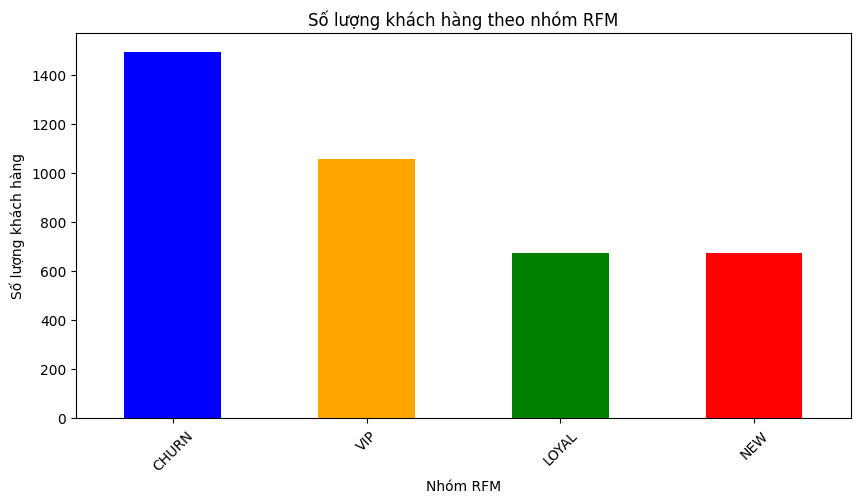

In [46]:
import matplotlib.pyplot as plt

# ƒê·∫øm s·ªë l∆∞·ª£ng kh√°ch h√†ng theo t·ª´ng nh√≥m RFM_Level
rfm_counts = df_RFM['RFM_Level'].value_counts()

print(rfm_counts)

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt th·ªÉ hi·ªán s·ªë l∆∞·ª£ng kh√°ch h√†ng trong t·ª´ng nh√≥m
plt.figure(figsize=(10, 5))
rfm_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])

plt.title('S·ªë l∆∞·ª£ng kh√°ch h√†ng theo nh√≥m RFM')
plt.xlabel('Nh√≥m RFM')
plt.ylabel('S·ªë l∆∞·ª£ng kh√°ch h√†ng')
plt.xticks(rotation=45)
plt.show()


# CHURN R th·∫•p ‚Üí ƒë√£ l√¢u kh√¥ng mua, F th·∫•p, M th·∫•p, ƒê√¢y l√† nh√≥m ƒë√£ r·ªùi b·ªè ho·∫∑c kh√¥ng c√≤n t∆∞∆°ng t√°c, chi·∫øm t·ª∑ tr·ªçng l·ªõn nh·∫•t ‚Üí c·∫ßn chi·∫øn d·ªãch t√°i k√≠ch ho·∫°t
# VIP Nh√≥m kh√°ch h√†ng gi√° tr·ªã nh·∫•t, chi ti√™u cao v√† t∆∞∆°ng t√°c th∆∞·ªùng xuy√™n ‚Üí ∆∞u ti√™n duy tr√¨ & chƒÉm s√≥c
# LOYAL Nh√≥m trung th√†nh tr∆∞·ªõc ƒë√¢y, g·∫ßn ƒë√¢y √≠t mua l·∫°i ‚Üí c√≥ th·ªÉ l√† kh√°ch h√†ng ƒëang ch·ªØng l·∫°i
# NEW Kh√°ch m·ªõi mua g·∫ßn ƒë√¢y nh∆∞ng ch∆∞a mua nhi·ªÅu ‚Üí c·∫ßn chuy·ªÉn h√≥a th√†nh kh√°ch trung th√†nh


# T√≠nh trung b√¨nh c·ªßa Recency, Frequency, Monetary cho t·ª´ng nh√≥m.

In [47]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg = df_RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [48]:
rfm_agg

RFM_Level  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0     CHURN        306.0            6.0          48.0   1495    38.35
1     LOYAL        247.0           13.0         110.0    672    17.24
2       NEW         68.0            6.0          57.0    672    17.24
3       VIP         59.0           15.0         139.0   1059    27.17

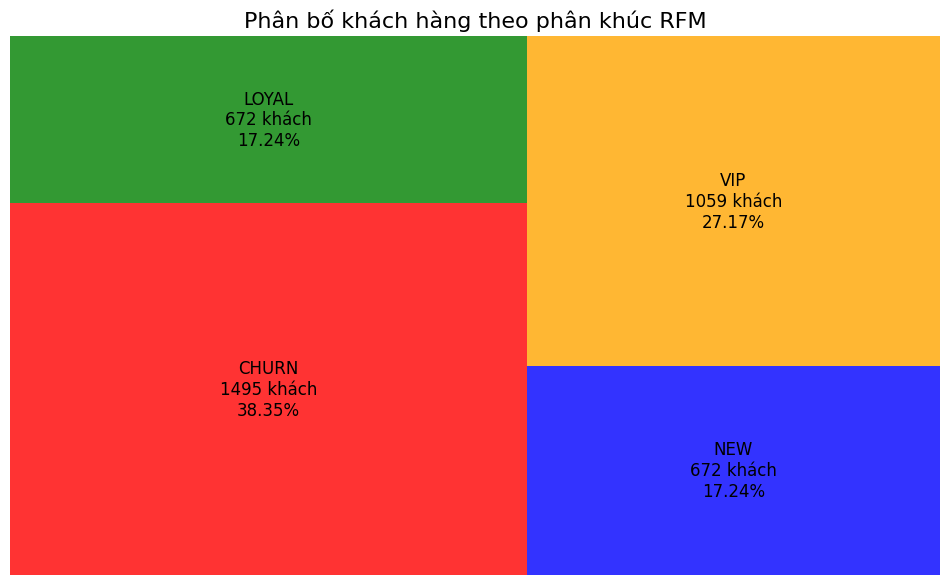

In [49]:
import matplotlib.pyplot as plt
import squarify  # pip install squarify n·∫øu ch∆∞a c√≥

# D·ªØ li·ªáu ƒë·∫ßu v√†o
labels = rfm_agg['RFM_Level'] + "\n" + \
         rfm_agg['Count'].astype(str) + " kh√°ch\n" + \
         rfm_agg['Percent'].astype(str) + "%"
sizes = rfm_agg['Count']
colors = ['red', 'green', 'blue', 'orange']  # ho·∫∑c ch·ªçn theo logic ri√™ng

# V·∫Ω bi·ªÉu ƒë·ªì TreeMap
plt.figure(figsize=(12, 7))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, text_kwargs={'fontsize': 12})

plt.axis('off')
plt.title("Ph√¢n b·ªë kh√°ch h√†ng theo ph√¢n kh√∫c RFM", fontsize=16)
plt.show()


## CHURN (ƒë·ªè)	1,495 kh√°ch	38.35%	Nh√≥m kh√°ch h√†ng ƒë√£ r·ªùi b·ªè, kh√¥ng mua g·∫ßn ƒë√¢y, √≠t mua, chi ti√™u th·∫•p. ƒê√¢y l√† nh√≥m chi·∫øm t·ª∑ l·ªá cao nh·∫•t ‚Üí c·∫ßn chi·∫øn d·ªãch t√°i k√≠ch ho·∫°t, remarketing, ∆∞u ƒë√£i quay l·∫°i.
## VIP (v√†ng cam)	1,059 kh√°ch	27.17%	Nh√≥m kh√°ch h√†ng gi√° tr·ªã cao nh·∫•t: th∆∞·ªùng xuy√™n mua, g·∫ßn ƒë√¢y, chi ti√™u l·ªõn ‚Üí c·∫ßn chƒÉm s√≥c ƒë·∫∑c bi·ªát, gi·ªØ ch√¢n b·∫±ng loyalty program, upsell/cross-sell.
## LOYAL (xanh l√°)	672 kh√°ch	17.24%	Nh√≥m trung th√†nh tr∆∞·ªõc ƒë√¢y, mua nhi·ªÅu nh∆∞ng kh√¥ng c√≤n mua g·∫ßn ƒë√¢y ‚Üí c·∫ßn k√≠ch th√≠ch quay l·∫°i, nh·∫Øc nh·ªõ, khuy·∫øn m√£i targeted.
## NEW (xanh d∆∞∆°ng)	672 kh√°ch	17.24%	Nh√≥m kh√°ch h√†ng m·ªõi mua g·∫ßn ƒë√¢y, nh∆∞ng ch∆∞a mua nhi·ªÅu ‚Üí ti·ªÅm nƒÉng chuy·ªÉn h√≥a th√†nh VIP n·∫øu ƒë∆∞·ª£c nurturing ƒë√∫ng c√°ch.

In [50]:
import plotly.express as px

fig = px.scatter(rfm_agg, x="MonetaryMean", y="RecencyMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max=80)
fig.show()

# Tr·ª•c Y c√†ng th·∫•p ‚Üí kh√°ch c√†ng m·ªõi mua g·∫ßn ƒë√¢y., Tr·ª•c X c√†ng cao ‚Üí kh√°ch chi ti√™u c√†ng nhi·ªÅu., Bubble c√†ng to ‚Üí kh√°ch c√†ng mua nhi·ªÅu l·∫ßn.

#  Nh√¨n v√†o ƒë√≥ ta th·∫•y:

# VIP ·ªü d∆∞·ªõi c√πng b√™n ph·∫£i ‚Üí t·ªët nh·∫•t to√†n di·ªán (chi ti√™u, t·∫ßn su·∫•t, g·∫ßn ƒë√¢y).

# CHURN ·ªü tr√™n c√πng b√™n tr√°i ‚Üí nh√≥m k√©m nh·∫•t, m·∫•t t∆∞∆°ng t√°c.

# NEW v√† LOYAL n·∫±m ·ªü gi·ªØa ‚Äì l√† hai nh√≥m ti·ªÅm nƒÉng n·∫øu c√≥ chi·∫øn l∆∞·ª£c gi·ªØ ch√¢n/nurture h·ª£p l√Ω.


# RFM + Kmeans

### Kmeans clusters with the Elbow Method

In [51]:
df_now = df_RFM[['Recency','Frequency','Monetary']]

In [52]:
df_now

Recency  Frequency  Monetary
Member_number                              
2433                 3         31    375.31
2193                91         27    361.45
1793                26         25    345.10
3289                 4         29    334.15
2743               142         17    312.46
...                ...        ...       ...
4565                 0          2      2.20
3949               273          2      2.10
1560               593          2      1.90
1221               410          2      1.70
1250               448          2      1.30

[3898 rows x 3 columns]

# chu·∫©n h√≥a d·ªØ li·ªáu tr∆∞·ªõc khi d√πng K-Means

# ƒê∆°n v·ªã ƒëo l∆∞·ªùng kh√°c nhau c·ªßa Recency, Frequency, Monetary

## V√≠ d·ª• v·ªÅ gi√° tr·ªã:
- **Recency (S·ªë ng√†y k·ªÉ t·ª´ l·∫ßn mua cu·ªëi):**  
  Gi√° tr·ªã th∆∞·ªùng r·∫•t l·ªõn (0 - 700 ng√†y).

- **Frequency (S·ªë l·∫ßn mua h√†ng):**  
  Gi√° tr·ªã nh·ªè h∆°n nhi·ªÅu (1 - 40 l·∫ßn).

- **Monetary (T·ªïng ti·ªÅn chi ti√™u):**  
  Gi√° tr·ªã c√≥ th·ªÉ r·∫•t l·ªõn (10 - 1000+ ƒë∆°n v·ªã ti·ªÅn t·ªá).

---

##  V·∫•n ƒë·ªÅ:
- K-Means s·ª≠ d·ª•ng kho·∫£ng c√°ch Euclidean ƒë·ªÉ t√≠nh to√°n c·ª•m.
- N·∫øu kh√¥ng chu·∫©n h√≥a d·ªØ li·ªáu, **Monetary** s·∫Ω c√≥ ·∫£nh h∆∞·ªüng l·ªõn h∆°n nhi·ªÅu so v·ªõi **Recency** v√† **Frequency**.
- ƒêi·ªÅu n√†y d·∫´n ƒë·∫øn m·∫•t c√¢n b·∫±ng c·ª•m, khi·∫øn k·∫øt qu·∫£ kh√¥ng ch√≠nh x√°c.

---





In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from scipy.spatial.distance import cdist

In [54]:

# Chu·∫©n h√≥a d·ªØ li·ªáu b·∫±ng RobustScaler (do c√≥ outliers)
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_now)

In [55]:
df_scaled

array([[-0.61883408,  3.14285714,  4.20242009],
       [-0.22421525,  2.57142857,  4.00853326],
       [-0.51569507,  2.28571429,  3.77981395],
       ...,
       [ 2.02690583, -1.        , -1.02119326],
       [ 1.20627803, -1.        , -1.02399105],
       [ 1.37668161, -1.        , -1.02958663]])

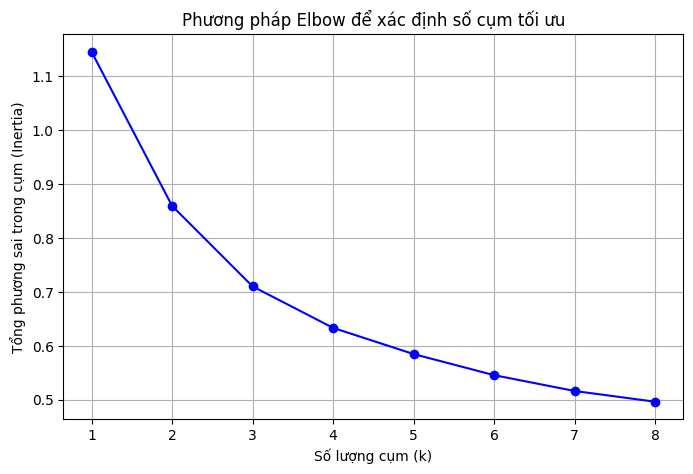

In [56]:
distortions = []
K = range(1, 9)

for k in K:
    kmean_model = KMeans(n_clusters=k, random_state=42)
    kmean_model.fit(df_scaled)
    distortions.append(sum(np.min(cdist(df_scaled, kmean_model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])


# V·∫Ω bi·ªÉu ƒë·ªì Elbow
plt.figure(figsize=(8, 5))
plt.plot(list(K), distortions, marker='o', linestyle='-', color='b')
plt.xlabel('S·ªë l∆∞·ª£ng c·ª•m (k)')
plt.ylabel('T·ªïng ph∆∞∆°ng sai trong c·ª•m (Inertia)')
plt.title('Ph∆∞∆°ng ph√°p Elbow ƒë·ªÉ x√°c ƒë·ªãnh s·ªë c·ª•m t·ªëi ∆∞u')
plt.xticks(list(K))
plt.grid()
plt.show()


In [57]:



optimal_k = 3  # Ch·ªçn s·ªë c·ª•m t·ª´ bi·ªÉu ƒë·ªì Elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
df_RFM['Cluster'] = kmeans.fit_predict(df_scaled)

# Xem k·∫øt qu·∫£ ph√¢n c·ª•m
df_RFM.head()


Recency  Frequency  Monetary  R  F  M RFM_Level  RFM_Score  \
Member_number                                                               
2433                 3         31    375.31  4  4  4       VIP         12   
2193                91         27    361.45  3  4  4       VIP         11   
1793                26         25    345.10  4  4  4       VIP         12   
3289                 4         29    334.15  4  4  4       VIP         12   
2743               142         17    312.46  2  4  4     LOYAL         10   

               Cluster  
Member_number           
2433                 2  
2193                 2  
1793                 2  
3289                 2  
2743                 2

In [58]:
df_now["Cluster"] = kmeans.labels_
df_now.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

C:\Users\PAT\AppData\Local\Temp\ipykernel_27336\1394860254.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        118.54      8.68    68.10  1930
1        413.85      5.32    42.59   953
2        106.88     16.69   157.78  1015

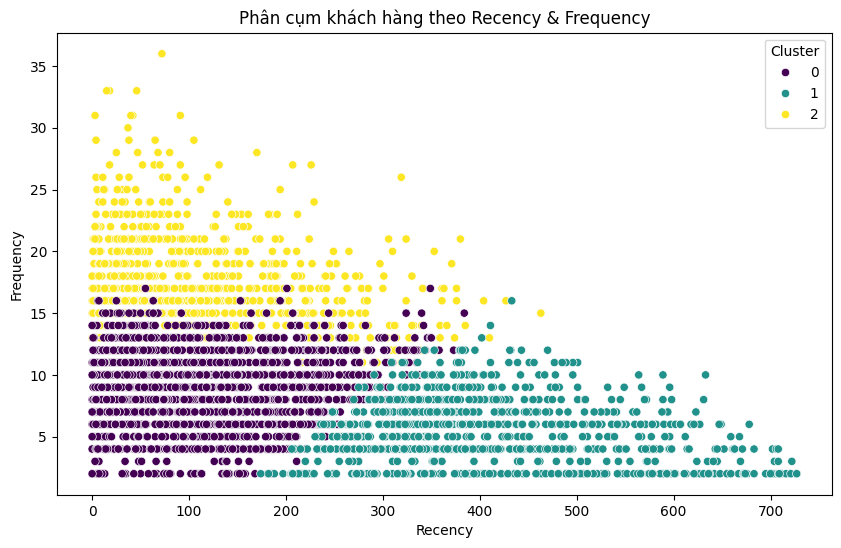

In [59]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_RFM['Recency'], y=df_RFM['Frequency'], hue=df_RFM['Cluster'], palette='viridis')
plt.title('Ph√¢n c·ª•m kh√°ch h√†ng theo Recency & Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()


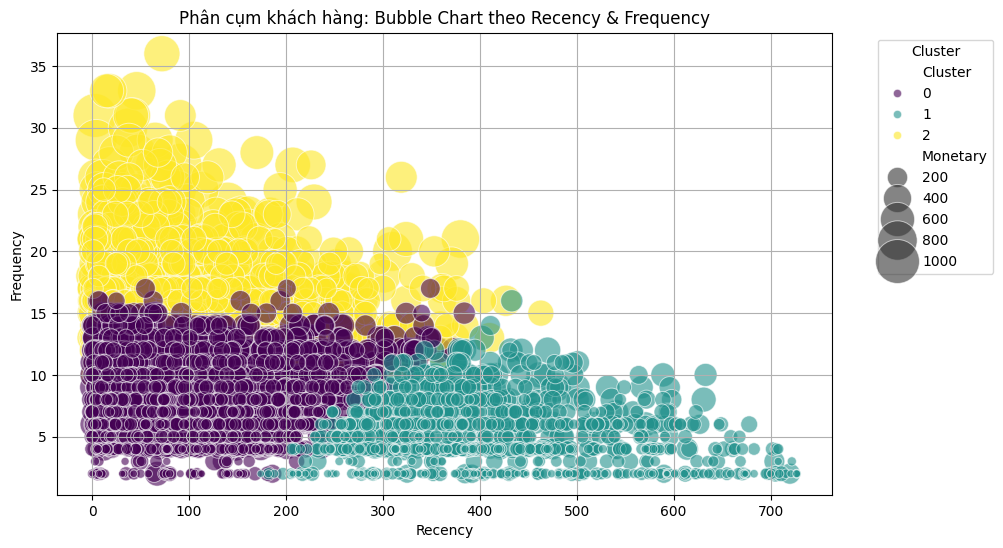

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chu·∫©n h√≥a k√≠ch th∆∞·ªõc bubble ƒë·ªÉ d·ªÖ hi·ªÉn th·ªã
bubble_size = df_RFM['Monetary'] / df_RFM['Monetary'].max() * 1000

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_RFM['Recency'],
    y=df_RFM['Frequency'],
    hue=df_RFM['Cluster'],
    size=bubble_size,            # k√≠ch th∆∞·ªõc bubble
    sizes=(20, 1000),            # gi·ªõi h·∫°n size bubble
    palette='viridis',
    alpha=0.6,
    edgecolor='w'
)
plt.title('Ph√¢n c·ª•m kh√°ch h√†ng: Bubble Chart theo Recency & Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [61]:
import plotly.express as px

fig = px.scatter(
    df_RFM,
    x='Recency',
    y='Frequency',
    size='Monetary',                # K√≠ch th∆∞·ªõc bubble
    color='Cluster',                # M√†u theo c·ª•m
    hover_name='Cluster',           # Hi·ªÉn th·ªã c·ª•m khi hover
    size_max=80,                    # Gi·ªõi h·∫°n k√≠ch th∆∞·ªõc bubble
    title='Bubble Chart: Recency vs Frequency (size = Monetary)'
)

fig.update_layout(
    xaxis_title='Recency',
    yaxis_title='Frequency',
    legend_title='Cluster'
)

fig.show()


In [62]:
# Cluster 1: CHURN / KH√ÅCH R·ªúI B·ªé: N·∫±m cao b√™n ph·∫£i (Recency cao, Frequency th·∫•p), Bubble nh·ªè (Monetary th·∫•p) ‚Üí Nh√≥m kh√°ch ƒë√£ l√¢u kh√¥ng quay l·∫°i, mua √≠t, chi ti√™u th·∫•p=>  C·∫ßn t√°i k√≠ch ho·∫°t b·∫±ng ∆∞u ƒë√£i/remarketing

# Cluster 2: VIP / KH√ÅCH GI√Å TR·ªä CAO: N·∫±m th·∫•p b√™n tr√°i, g·∫ßn tr·ª•c Y cao (Recency th·∫•p, Frequency cao); Bubble to (Monetary cao) ‚Üí Nh√≥m kh√°ch mua g·∫ßn ƒë√¢y, th∆∞·ªùng xuy√™n v√† chi ti√™u l·ªõn =>  C·∫ßn gi·ªØ ch√¢n b·∫±ng loyalty program, ∆∞u ƒë√£i ƒë·∫∑c bi·ªát

#  Cluster 0: TRUNG B√åNH / KH√ÅCH PH·ªî TH√îNG: V·ªã tr√≠ trung gian, recency kh√¥ng qu√° c≈©, frequency v·ª´a, monetary t·∫ßm trung ‚Üí Nh√≥m kh√°ch c√≥ ti·ªÅm nƒÉng ‚Üí c√≥ th·ªÉ upsell ho·∫∑c khuy·∫øn kh√≠ch mua th∆∞·ªùng xuy√™n h∆°n

# RFM + GMM:


In [63]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

In [64]:
df_now1=df_now.copy()
df_now1

Recency  Frequency  Monetary  Cluster
Member_number                                       
2433                 3         31    375.31        2
2193                91         27    361.45        2
1793                26         25    345.10        2
3289                 4         29    334.15        2
2743               142         17    312.46        2
...                ...        ...       ...      ...
4565                 0          2      2.20        0
3949               273          2      2.10        1
1560               593          2      1.90        1
1221               410          2      1.70        1
1250               448          2      1.30        1

[3898 rows x 4 columns]

In [65]:
# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_now1)


# L∆∞u tr·ªØ BIC v√† AIC cho c√°c s·ªë l∆∞·ª£ng ph√¢n ph·ªëi kh√°c nhau
bic = []
aic = []
n_components_range = range(1, 11)  # Th·ª≠ nghi·ªám v·ªõi 1 ƒë·∫øn 10 c·ª•m

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df_scaled)
    bic.append(gmm.bic(df_scaled))  # L∆∞u BIC
    aic.append(gmm.aic(df_scaled))  # L∆∞u AIC

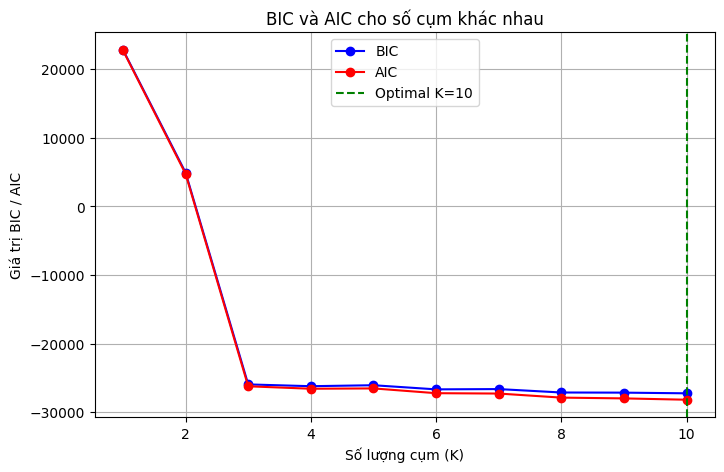

S·ªë c·ª•m t·ªëi ∆∞u theo BIC: 10


In [66]:
# V·∫Ω ƒë·ªì th·ªã BIC v√† AIC
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, bic, marker='o', linestyle='-', color='b', label='BIC')
plt.plot(n_components_range, aic, marker='o', linestyle='-', color='r', label='AIC')

# ƒê√°nh d·∫•u s·ªë c·ª•m t·ªëi ∆∞u
optimal_k = n_components_range[np.argmin(bic)]
plt.axvline(optimal_k, linestyle='--', color='g', label=f'Optimal K={optimal_k}')

plt.xlabel('S·ªë l∆∞·ª£ng c·ª•m (K)')
plt.ylabel('Gi√° tr·ªã BIC / AIC')
plt.title('BIC v√† AIC cho s·ªë c·ª•m kh√°c nhau')
plt.legend()
plt.grid()
plt.show()

print(f"S·ªë c·ª•m t·ªëi ∆∞u theo BIC: {optimal_k}")

In [67]:
# Hu·∫•n luy·ªán GMM v·ªõi s·ªë c·ª•m t·ªëi ∆∞u
gmm_final = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_final.fit(df_scaled)

# D·ª± ƒëo√°n nh√£n c·ª•m cho t·ª´ng ƒëi·ªÉm d·ªØ li·ªáu
labels = gmm_final.predict(df_scaled)

# Th√™m nh√£n v√†o dataframe g·ªëc
df_now1['Cluster'] = labels

# Hi·ªÉn th·ªã k·∫øt qu·∫£
df_now1



Recency  Frequency  Monetary  Cluster
Member_number                                       
2433                 3         31    375.31        2
2193                91         27    361.45        2
1793                26         25    345.10        2
3289                 4         29    334.15        2
2743               142         17    312.46        2
...                ...        ...       ...      ...
4565                 0          2      2.20        9
3949               273          2      2.10        7
1560               593          2      1.90        7
1221               410          2      1.70        7
1250               448          2      1.30        7

[3898 rows x 4 columns]

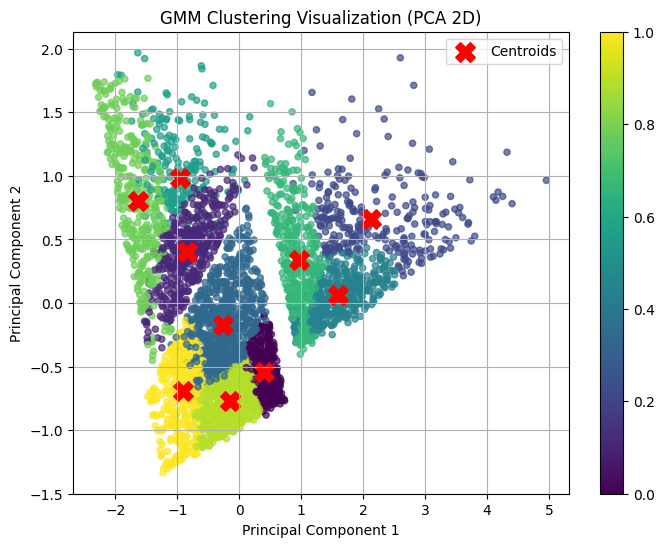

In [68]:
from sklearn.decomposition import PCA


# Gi·∫£m chi·ªÅu d·ªØ li·ªáu t·ª´ 4D xu·ªëng 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# V·∫Ω bi·ªÉu ƒë·ªì scatter 2D
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', s=20, alpha=0.7)
plt.scatter(pca.transform(gmm_final.means_)[:, 0], pca.transform(gmm_final.means_)[:, 1],
            c='red', marker='X', s=200, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clustering Visualization (PCA 2D)')
plt.legend()
plt.grid()
plt.colorbar()
plt.show()


In [69]:
import plotly.express as px
import pandas as pd
import numpy as np

# T·∫°o DataFrame t·ª´ PCA k·∫øt qu·∫£
df_pca_plot = pd.DataFrame({
    'PC1': df_pca[:, 0],
    'PC2': df_pca[:, 1],
    'Cluster': labels.astype(str)  # ƒë·ªïi sang chu·ªói ƒë·ªÉ m√†u d·ªÖ ph√¢n bi·ªát
})

# Th√™m ƒëi·ªÉm centroid (center c·ªßa GMM) ƒë√£ PCA transform
centroids_pca = pca.transform(gmm_final.means_)
df_centroids = pd.DataFrame({
    'PC1': centroids_pca[:, 0],
    'PC2': centroids_pca[:, 1],
    'Cluster': ['Centroid'] * len(centroids_pca)
})

# V·∫Ω scatter plot t∆∞∆°ng t√°c
fig = px.scatter(
    df_pca_plot,
    x='PC1',
    y='PC2',
    color='Cluster',
    title='GMM Clustering Visualization (PCA 2D)',
    opacity=0.7,
    width=800,
    height=600
)

# V·∫Ω th√™m c√°c centroid (m√†u ƒë·ªè, marker X)
fig.add_scatter(
    x=df_centroids['PC1'],
    y=df_centroids['PC2'],
    mode='markers',
    marker=dict(size=15, color='red', symbol='x'),
    name='Centroids'
)

fig.update_layout(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    legend_title='Cluster'
)

fig.show()


- ƒê√£ th·ª±c hi·ªán gi·∫£m chi·ªÅu d·ªØ li·ªáu v√† nh√≥m ƒë∆∞·ª£c 3 nh√≥m kh√°ch h√†ng.
Ph√¢n c·ª•m kh√°ch h√†ng th√†nh 3 nh√≥m ch√≠nh:
- **VIP / GI√Å TR·ªä CAO (Cluster 0)**: Kh√°ch h√†ng mua g·∫ßn ƒë√¢y, th∆∞·ªùng xuy√™n v√† chi ti√™u cao.
- **CHURN / KH√ÅCH R·ªúI B·ªé (Cluster 1)**: Kh√°ch ƒë√£ l√¢u kh√¥ng quay l·∫°i, mua √≠t v√† chi ti√™u th·∫•p.
- **TRUNG B√åNH / PH·ªî TH√îNG (Cluster 2)**: Kh√°ch ·ªü m·ª©c trung b√¨nh, c√≥ ti·ªÅm nƒÉng ƒë·ªÉ ph√°t tri·ªÉn th√™m.

In [70]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
import joblib

# Ch·ªâ ch·ªçn 3 c·ªôt g·ªëc ƒë·ªÉ fit
X = df_RFM[["Recency", "Frequency", "Monetary"]]

# Hu·∫•n luy·ªán l·∫°i scaler v√† model
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# L∆∞u l·∫°i m√¥ h√¨nh ƒë√∫ng
joblib.dump(scaler, "rfm_scaler.pkl")
joblib.dump(kmeans, "kmeans_model.pkl")


['kmeans_model.pkl']

In [71]:
import joblib
scaler = joblib.load("rfm_scaler.pkl")
print(scaler.feature_names_in_)


['Recency' 'Frequency' 'Monetary']


In [72]:
import joblib

# L∆∞u d·ªØ li·ªáu RFM ƒë√£ chu·∫©n b·ªã
joblib.dump(df_RFM, "rfm_data.pkl")


['rfm_data.pkl']